In [1]:
import sampleTopology as sT
import numpy as np
import matplotlib.pyplot as plt
import pickle

np.set_printoptions(suppress=True)

In [2]:
def acceptreject(L_accept, L_reject):
    L_accept_x = [L_accept[i][0] for i in range(len(L_accept))]
    L_accept_y = [L_accept[i][2] for i in range(len(L_accept))]
    
    L_reject_x = [L_reject[i][0] for i in range(len(L_reject))]
    L_reject_y = [L_reject[i][2] for i in range(len(L_reject))]
    
    return [L_accept_x, L_accept_y, L_reject_x, L_reject_y]

In [29]:
Manifold = 'E2'

precision = 2000                                      #Number of points in manifold to test
paramPrecision = 10

alpha = beta = gamma = np.pi/2

L1 = np.array([np.random.uniform(low = 1, high = 2, size = paramPrecision)])
L2 = np.array([np.random.uniform(low = L1[0], high = 2, size = paramPrecision)])
L3 = np.array([np.random.uniform(low = 0.5, high = 1.1, size = paramPrecision)])


#Since we are constraining to a square FD, we have L1 twice, otherwise can switch to L1 and L2
random_L_Sample = np.dstack((L1[0], L1[0], L3[0]))[0]

angles = np.array([alpha, beta, gamma])
L_accept = []
L_reject = []

for i in range(paramPrecision): 
    #L_Scale, angles = paramSpace(Manifold, random_L_Sample[0][i], angles)
    
    percents, excludedPoints, allowedPoints = sT.samplePoints(Manifold, angles, precision, random_L_Sample[i])
    
    if percents>0.05:
        L_accept.append(random_L_Sample[i])
    else:
        L_reject.append(random_L_Sample[i])
    if (i%10 == 0):
        print(i)


sampled_params_file = open(f'test.obj', 'wb') 
param_scatter = {'L_accept': L_accept, 'L_reject':L_reject}
pickle.dump(param_scatter, sampled_params_file)
sampled_params_file.close()
plt.close('all')

print('done')

0
done


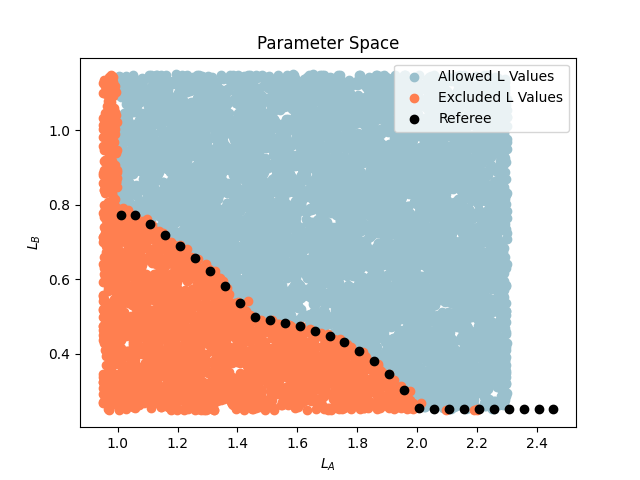

In [53]:
plt.close('all')

#Only needs to be defined correctly when plotting the referee data too
Manifold = 'E3' 


#Loads in the scatter plot file from above
paramSpace_sample = pickle.load(open('E3_param_0_05_zoom.obj', 'rb'))


#Divides the L values between their 'accepted' and 'rejected' status from the Pickle file
L_accept = paramSpace_sample['L_accept']
L_reject = paramSpace_sample['L_reject']


#Reformats the imported data
L_Sliced = acceptreject(L_accept, L_reject)


#Plots the accepted and rejected points in different colours
fig, ax = plt.subplots()
ax.scatter(L_Sliced[0], L_Sliced[1], color = '#9AC0CD', label = "Allowed L Values")
ax.scatter(L_Sliced[2], L_Sliced[3], color = 'coral', label = "Excluded L Values")


#Extra plotting stuff
ax.scatter(refereeData(Manifold)[0], refereeData(Manifold)[1], color = 'black', label = 'Referee')
plt.xlabel(f'$L_A$')
plt.ylabel(f'$L_B$')
plt.title('Parameter Space')
plt.legend(loc = 'upper right')
plt.show()

In [51]:
def refereeData(Manifold):
    if Manifold == 'E2':
        ref_x = [
        1.0100, 1.0598, 1.1096, 1.1594, 1.2092, 1.2590, 1.3088, 1.3586, 1.4084, 1.4582,
        1.5080, 1.5578, 1.6076, 1.6574, 1.7072, 1.7570, 1.8068, 1.8566, 1.9064, 1.9562]
        #2.0060, 2.0558, 2.1056, 2.1554, 2.2052, 2.2550, 2.3048, 2.3546, 2.4044, 2.4542,
        #2.5040, 2.5538, 2.6036, 2.6534, 2.7032, 2.7530, 2.8028, 2.8526, 2.9024, 2.9522,
        #3.0020, 3.0518, 3.1016, 3.1514, 3.2012, 3.2510, 3.3008, 3.3506, 3.4004, 3.4502
        #]

        ref_y = [
        0.796, 0.773, 0.747, 0.720, 0.689, 0.657, 0.621, 0.581, 0.537, 0.500,
        0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500]
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500,
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500,
        #0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500, 0.500
        #]
        
    elif Manifold == 'E3':
        ref_x = [
        1.0100, 1.0598, 1.1096, 1.1594, 1.2092, 1.2590, 1.3088, 1.3586, 1.4084, 1.4582,
        1.5080, 1.5578, 1.6076, 1.6574, 1.7072, 1.7570, 1.8068, 1.8566, 1.9064, 1.9562,
        2.0060, 2.0558, 2.1056, 2.1554, 2.2052, 2.2550, 2.3048, 2.3546, 2.4044, 2.4542]
        #2.5040, 2.5538, 2.6036, 2.6534, 2.7032, 2.7530, 2.8028, 2.8526, 2.9024, 2.9522,
        #3.0020, 3.0518, 3.1016, 3.1514, 3.2012, 3.2510, 3.3008, 3.3506, 3.4004, 3.4502
        #]

        ref_y = [
        0.772, 0.772, 0.747, 0.719, 0.689, 0.657, 0.621, 0.581, 0.537, 0.498,
        0.491, 0.483, 0.473, 0.461, 0.447, 0.430, 0.408, 0.379, 0.344, 0.303,
        0.253, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250]
        #0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250,
        #0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250, 0.250
        #]
        
    return[ref_x, ref_y]